# Python Program to un-Tar Landsat tar bundles downloaded from Earth Explorer or their Machine 2 Machine (M2M) python software.

We first un-Tar the tar bundle in our python Jupyter Notebook and then combine Bands 2, 3 and 4 to create a Red-Green-Blue (RGB)image that we can viewed with matlpotlib. 

![image.png](Landsat_RGB_tile.png)

We have also included a X and Y slide bars so that we can zoom in on the data and also save the image. 

![image.png](Landsat_RGB_zoom.png)

## Un-Tar our Tar Ball from Earth Explorer:

In [1]:
import tarfile

# Extract files from tar archive
tar = tarfile.open("/Users/craig/Documents/GitHub/m2m_landsat_bands_bundle_download_CP/data/LC09_L2SP_017041_20240221_20240223_02_T1.tar") 
#tar.extractall('/Users/craig/Documents/GitHub/m2m_landsat_bands_bundle_download_CP/'.format(ID)) 
tar.extractall("/Users/craig/Documents/GitHub/m2m_landsat_bands_bundle_download_CP/data/untar/") 
tar.close()


## Create an RGB Image from Bands 2, 3 and 4:

In [2]:
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt


# Load Blue (B2), Green (B3) and Red (B4) bands
#B2 = tiff.imread('./data/{}/{}_SR_B2.TIF'.format(ID, ID)) 
#B3 = tiff.imread('./data/{}/{}_SR_B3.TIF'.format(ID, ID)) 
#B4 = tiff.imread('./data/{}/{}_SR_B4.TIF'.format(ID, ID))

# Load Blue (B2), Green (B3) and Red (B4) bands
B2 = tiff.imread('./data/untar/LC09_L2SP_017041_20240221_20240223_02_T1_SR_B2.TIF') 
B3 = tiff.imread('./data/untar/LC09_L2SP_017041_20240221_20240223_02_T1_SR_B3.TIF') 
B4 = tiff.imread('./data/untar/LC09_L2SP_017041_20240221_20240223_02_T1_SR_B4.TIF')


# Stack and scale bands
RGB = np.dstack((B4, B3, B2))
RGB = np.clip(RGB*0.0000275-0.2, 0, 1)

# Clip to enhance contrast
RGB = np.clip(RGB,0,0.2)/0.2



## Display RGB:

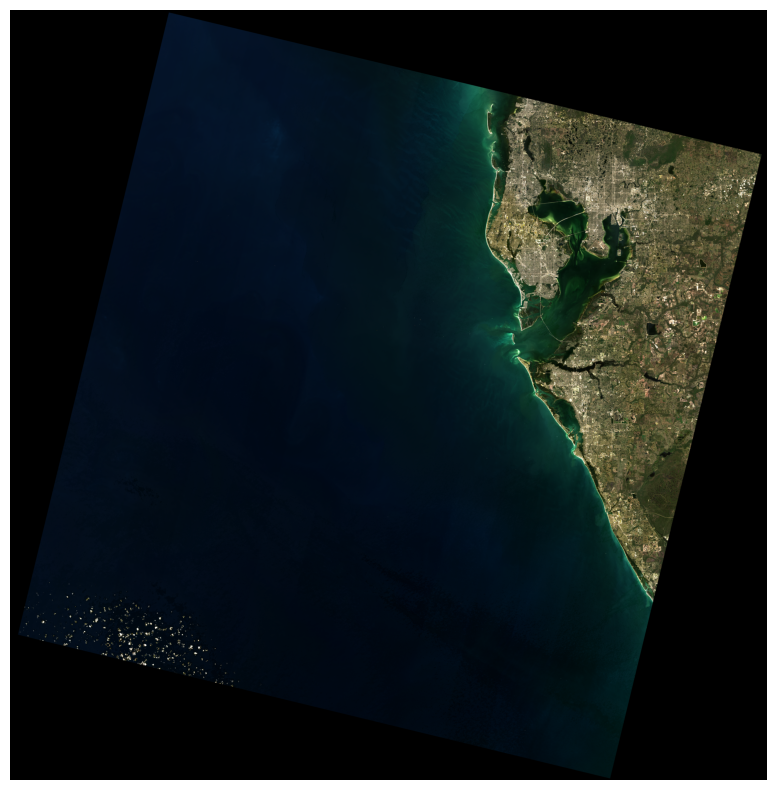

In [3]:
# Display RGB image
fig, ax = plt.subplots(figsize=(10, 10)) 
plt.imshow(RGB)
ax.set_axis_off()

In [4]:
RGB.shape

(7861, 7721, 3)

## Display RGB with Range Sliders:

In [5]:
from ipywidgets import interact, FloatRangeSlider, Layout
from IPython.display import display



# Define a function to display the RGB image based on the selected range and zoom level
def display_rgb_image(xlim, ylim):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(RGB, extent=(0, RGB.shape[1], 0, RGB.shape[0]))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.grid(True)  # Enable grid for better visualization
    plt.show()

# Define the range sliders for zooming (x and y limits)
xlim_slider = FloatRangeSlider(
    value=[5350, 5580],
    min=0,
    max=RGB.shape[1],
    step=10,
    description='X-Limit:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)

ylim_slider = FloatRangeSlider(
    value=[4100, 4270],
    min=0,
    max=RGB.shape[0],
    step=10,
    description='Y-Limit:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)

# Create the interactive widget
rgb_interactive = interact(
    display_rgb_image,
    xlim=xlim_slider,
    ylim=ylim_slider
)


interactive(children=(FloatRangeSlider(value=(5350.0, 5580.0), continuous_update=False, description='X-Limit:'…

## Display RGB with Range Sliders and Save the Image:

In [6]:
from ipywidgets import interact, FloatRangeSlider, Layout, Checkbox, Text



# Define a function to display the RGB image based on the selected range and zoom level
def display_rgb_image(xlim, ylim, save=False, filename='rgb_image.png'):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(RGB, extent=(0, RGB.shape[1], 0, RGB.shape[0]))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.grid(True)  # Enable grid for better visualization
    plt.show()
    
    if save:
        fig.savefig(filename)
        print(f"Image saved as {filename}")

# Define the range sliders for zooming (x and y limits)
xlim_slider = FloatRangeSlider(
    value=[5350, 5580],
    min=0,
    max=RGB.shape[1],
    step=10,
    description='X-Limit:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)

ylim_slider = FloatRangeSlider(
    value=[4100, 4270],
    min=0,
    max=RGB.shape[0],
    step=10,
    description='Y-Limit:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)

# Checkbox widget to enable/disable saving
save_checkbox = Checkbox(
    value=False,
    description='Save Image',
    layout=Layout(width='15%')
)

# Text widget for filename input
filename_text = Text(
    value='rgb_image.png',
    description='Filename:',
    layout=Layout(width='30%')
)

# Create the interactive widget
rgb_interactive = interact(
    display_rgb_image,
    xlim=xlim_slider,
    ylim=ylim_slider,
    save=save_checkbox,
    filename=filename_text
)


interactive(children=(FloatRangeSlider(value=(5350.0, 5580.0), continuous_update=False, description='X-Limit:'…

## Display RGB with Range Sliders and RGB Cutoffs for future use:

In [7]:
from ipywidgets import interact, FloatRangeSlider, Layout
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff

# Load Blue (B2), Green (B3) and Red (B4) bands
B2 = tiff.imread('./data/untar/LC09_L2SP_017041_20240221_20240223_02_T1_SR_B2.TIF') 
B3 = tiff.imread('./data/untar/LC09_L2SP_017041_20240221_20240223_02_T1_SR_B3.TIF') 
B4 = tiff.imread('./data/untar/LC09_L2SP_017041_20240221_20240223_02_T1_SR_B4.TIF')

# Stack and scale bands
RGB = np.dstack((B4, B3, B2))
RGB = np.clip(RGB * 0.0000275 - 0.2, 0, 1)
RGB = np.clip(RGB, 0, 0.2) / 0.2

# Define a function to display the RGB image based on the selected range and zoom level
def display_rgb_image(xlim, ylim, range_values):
    low, high = range_values
    rgb_display = np.where((RGB >= low) & (RGB <= high), RGB, np.nan)
    fig = plt.figure(figsize=(20, 15))
    gs = fig.add_gridspec(2, 1, height_ratios=[1, 10])  # 2 rows: histogram and RGB image

    # Plot histogram
    ax_hist = fig.add_subplot(gs[0])
    ax_hist.hist(RGB.flatten(), bins=100, color='skyblue', alpha=0.7, range=(0.1, 1))
    ax_hist.axvline(low, color='red', linestyle='dashed', linewidth=3)
    ax_hist.axvline(high, color='red', linestyle='dashed', linewidth=3)
    ax_hist.set_title('RGB Histogram')
    ax_hist.set_xlabel('RGB Values')
    ax_hist.set_ylabel('Frequency')
    ax_hist.grid(True)

    # Plot RGB image
    ax_rgb = fig.add_subplot(gs[1])
    im = ax_rgb.imshow(rgb_display, extent=(0, RGB.shape[1], 0, RGB.shape[0]))
    plt.colorbar(im, ax=ax_rgb, label='RGB')
    ax_rgb.set_title('RGB Image (Selected Range: [{}, {}])'.format(low, high))
    ax_rgb.set_xlim(xlim)
    ax_rgb.set_ylim(ylim)
    ax_rgb.grid(True)  # Enable grid for better visualization

    plt.show()

# Define the range slider for RGB values
rgb_range_slider = FloatRangeSlider(
    value=[0.1, 1.0],
    min=-0.1,
    max=1.2,
    step=0.01,
    description='RGB Range:',
    continuous_update=False,
    readout_format='.2f',
    layout=Layout(width='100%')  # Adjust width of the slider
)

# Define the range sliders for zooming (x and y limits)
xlim_slider = FloatRangeSlider(
    value=[5350, 5580],
    min=0,
    max=RGB.shape[1],
    step=10,
    description='X-Limit:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)

ylim_slider = FloatRangeSlider(
    value=[4100, 4270],
    min=0,
    max=RGB.shape[0],
    step=10,
    description='Y-Limit:',
    continuous_update=False,
    layout=Layout(width='90%')  # Adjust width of the slider
)

# Create the interactive widget
rgb_interactive = interact(
    display_rgb_image,
    range_values=rgb_range_slider,
    xlim=xlim_slider,
    ylim=ylim_slider
)


interactive(children=(FloatRangeSlider(value=(5350.0, 5580.0), continuous_update=False, description='X-Limit:'…